In [1]:
import os
import sys
import time
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Flatten, Conv2D, MaxPooling2D, Dropout, Dense, GlobalAveragePooling2D
%matplotlib inline

In [2]:
for module in tf, mpl, np, pd, sklearn:
    print(module.__name__, module.__version__)

tensorflow 2.5.0
matplotlib 3.3.4
numpy 1.20.1
pandas 1.2.4
sklearn 0.24.1


In [3]:
(x_train_all, y_train_all), (x_test, y_test) = keras.datasets.cifar10.load_data()

x_valid, x_train = x_train_all[:5000], x_train_all[5000:]
y_valid, y_train = y_train_all[:5000], y_train_all[5000:]

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)
print(x_valid.shape, y_valid.shape)

print(np.min(x_train), np.max(x_train))

(45000, 32, 32, 3) (45000, 1)
(10000, 32, 32, 3) (10000, 1)
(5000, 32, 32, 3) (5000, 1)
0 255


In [4]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train.astype(np.float32).reshape(-1, 1)).reshape(-1, 32, 32, 3)
x_valid_scaled = scaler.transform(x_valid.astype(np.float32).reshape(-1, 1)).reshape(-1, 32, 32, 3)
x_test_scaled = scaler.transform(x_test.astype(np.float32).reshape(-1, 1)).reshape(-1, 32, 32, 3)

print(np.max(x_train_scaled), np.min(x_train_scaled))

2.0938833 -1.8828921


In [5]:
# x_train = np.expand_dims(x_train, -1)
# print(x_train.shape)

# x_test = np.expand_dims(x_test, -1)
# print(x_test.shape)

In [6]:
model = tf.keras.Sequential()
model.add(Conv2D(128, (3, 3), input_shape=x_train.shape[1:], activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D())
model.add(Dropout(0.5))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D())
model.add(Dropout(0.5))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Dropout(0.5))
model.add(GlobalAveragePooling2D())
model.add(Dense(10, activation='softmax'))

In [7]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [8]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1407/1407 [==============================] - 26s 16ms/step - loss: 2.2269 - acc: 0.1709 - val_loss: 2.2560 - val_acc: 0.1711
Epoch 2/10
1407/1407 [==============================] - 22s 15ms/step - loss: 1.6854 - acc: 0.3680 - val_loss: 1.5633 - val_acc: 0.4196
Epoch 3/10
1407/1407 [==============================] - 22s 15ms/step - loss: 1.4338 - acc: 0.4801 - val_loss: 1.3466 - val_acc: 0.5182
Epoch 4/10
1407/1407 [==============================] - 22s 15ms/step - loss: 1.2680 - acc: 0.5458 - val_loss: 1.2179 - val_acc: 0.5743
Epoch 5/10
1407/1407 [==============================] - 22s 15ms/step - loss: 1.1588 - acc: 0.5904 - val_loss: 1.1559 - val_acc: 0.6001
Epoch 6/10
1407/1407 [==============================] - 22s 15ms/step - loss: 1.0932 - acc: 0.6154 - val_loss: 1.0300 - val_acc: 0.6417
Epoch 7/10
1407/1407 [==============================] - 22s 15ms/step - loss: 1.0330 - acc: 0.6387 - val_loss: 1.0460 - val_acc: 0.6457
Epoch 8/10
1407/1407 [==========================

In [9]:
print(history.history.keys())

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


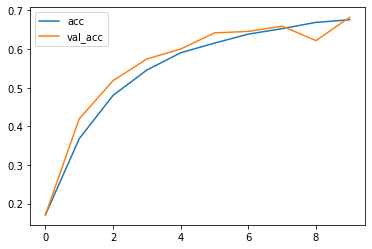

In [10]:
plt.plot(history.epoch, history.history.get('acc'), label='acc')
plt.plot(history.epoch, history.history.get('val_acc'), label='val_acc')
plt.legend()
plt.show()

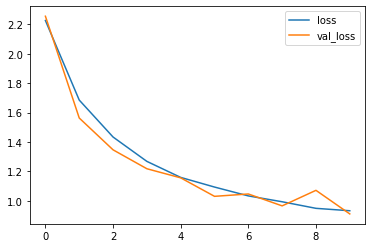

In [11]:
plt.plot(history.epoch, history.history.get('loss'), label='loss')
plt.plot(history.epoch, history.history.get('val_loss'), label='val_loss')
plt.legend()
plt.show()